<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DDDM/blob/main/COIN/commons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is why we can't have nice things

[model](https://personal.ems.psu.edu/~dmb53/Earth_System_Models/Modeling_TOC.html)

[DOI 10.1126/science.162.3859.1243](https://dx.doi.org/10.1126/science.162.3859.1243) fulltext available through the McGill Library

In [ ]:
owners = 2
milkRate = 0.4 # l per kg of grass eaten
dailyMax = 5 # kg per day per sheep
dailyMin = 1 # kg per day per sheep to survive
price = 10 # dollars per litre
maintenance = 0.5 # dollars per day per sheep
surface = 1000 # square meters of grass available at start
initial = 15 # kg per m2 of grass at the start
growthRate = 0.9 # multiple that grows each night of the grass that was left

In [ ]:
limit = 100
grass = surface * initial
sheep = [1] * owners
balance = [0] * owners
step = 0

from collections import defaultdict
trackRecord = defaultdict(list)
ecology = []

while grass > 0 and step <= limit:
  totalSheep = sum(sheep)
  consumption = min(grass, totalSheep * dailyMax)
  grass -= consumption # what the sheep ate during the day
  fulfillment = consumption / totalSheep # how much did each sheep get
  print(step, consumption, grass, '' if fulfillment > dailyMin else 'hungry sheep')
  for owner in range(owners):
    cost = sheep[owner] * maintenance
    income = sheep[owner] * (fulfillment * milkRate * price)
    profit = income - cost
    balance[owner] += profit
    trackRecord[owner].append(profit)
    if (step > 0 and profit >= trackRecord[owner][-1]) and fulfillment > dailyMin: # made money, sheep are surviving
      sheep[owner] += 1 # add a sheep
  grass *= growthRate # what grows back each night
  ecology.append(grass)
  step += 1


0 10 14990 
1 10 13481.0 
2 20 12112.9 
3 30 10871.61 
4 40 9744.449 
5 50 8720.0041 
6 60 7788.0036900000005 
7 70 6939.203321000001 
8 80 6165.282988900001 
9 90 5458.7546900100015 
10 100 4812.879221009001 
11 110 4221.591298908102 
12 120 3679.4321690172915 
13 130 3181.4889521155624 
14 140 2723.3400569040064 
15 150 2301.0060512136056 
16 160 1910.9054460922453 
17 170 1549.8149014830208 
18 180 1214.8334113347187 
19 190 903.3500702012468 
20 200 613.0150631811222 
21 210 341.71355686301 
22 220 87.542201176709 
23 78.7879810590381 0.0 


In [ ]:
if steps == limit:
  print('All seemed well')
else:
  print(steps, sheep, '{:.2f}'.format(sum(balance)), grass)

13 [24, 24] 10198.15 0.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

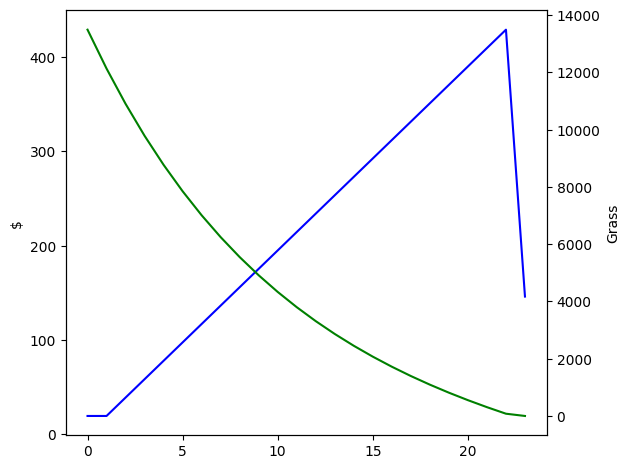

In [ ]:
t = [ i for i in range(len(trackRecord[0])) ]
fig, ax1 = plt.subplots()
ax1.plot(t, trackRecord[0], color = 'blue')
ax1.set_ylabel('$')
ax2 = ax1.twinx()
ax2.plot(t, ecology, color = 'green')
ax2.set_ylabel('Grass')
fig.tight_layout()
plt.show()

In [ ]:
cap = 5 # maximum of sheep per owner

limit = 100
grass = surface * initial
sheep = [1] * owners
balance = [0] * owners
step = 0

trackRecord = defaultdict(list)
ecology = []

while grass > 0 and step <= limit:
  totalSheep = sum(sheep)
  consumption = min(grass, totalSheep * dailyMax)
  grass -= consumption # what the sheep ate during the day
  fulfillment = consumption / totalSheep # how much did each sheep get
  print(step, consumption, grass, '' if fulfillment > dailyMin else 'hungry sheep')
  for owner in range(owners):
    cost = sheep[owner] * maintenance
    income = sheep[owner] * (fulfillment * milkRate * price)
    profit = income - cost
    balance[owner] += profit
    trackRecord[owner].append(profit)
    if sheep[owner] < cap and (step > 0 and profit >= trackRecord[owner][-1]) and fulfillment > dailyMin: # made money, sheep are surviving
      sheep[owner] += 1 # add a sheep
  grass *= growthRate # what grows back each night
  ecology.append(grass)
  step += 1 # upwards counter

0 10 14990 
1 10 13481.0 
2 20 12112.9 
3 30 10871.61 
4 40 9744.449 
5 50 8720.0041 
6 50 7798.0036900000005 
7 50 6968.203321000001 
8 50 6221.382988900001 
9 50 5549.244690010001 
10 50 4944.320221009001 
11 50 4399.888198908101 
12 50 3909.899379017291 
13 50 3468.909441115562 
14 50 3072.018497004006 
15 50 2714.8166473036054 
16 50 2393.334982573245 
17 50 2104.0014843159206 
18 50 1843.6013358843286 
19 50 1609.2412022958958 
20 50 1398.3170820663063 
21 50 1208.4853738596757 
22 50 1037.6368364737082 
23 50 883.8731528263373 
24 50 745.4858375437036 
25 50 620.9372537893332 
26 50 508.8435284103999 
27 50 407.95917556935996 
28 50 317.16325801242397 
29 50 235.4469322111816 
30 50 161.90223899006344 
31 50 95.71201509105711 
32 50 36.140813581951406 
33 32.52673222375627 0.0 


In [ ]:
if steps == limit:
  print('All seemed well')
else:
  print(steps, sheep, '{:.2f}'.format(sum(balance)), grass)

13 [5, 5] 6014.11 0.0


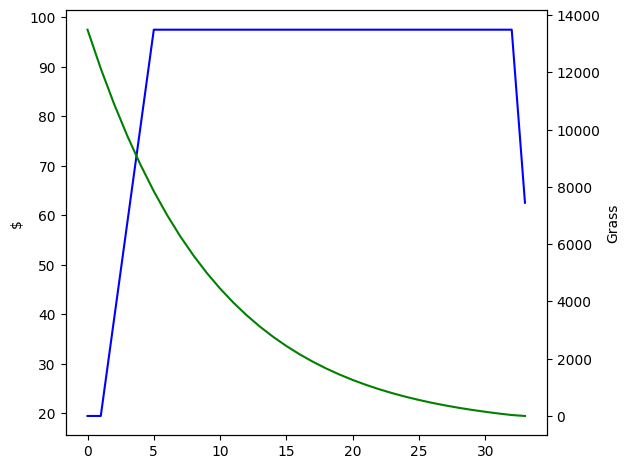

In [ ]:
t = [ i for i in range(len(trackRecord[0])) ]
fig, ax1 = plt.subplots()
ax1.plot(t, trackRecord[0], color = 'blue')
ax1.set_ylabel('$')
ax2 = ax1.twinx()
ax2.plot(t, ecology, color = 'green')
ax2.set_ylabel('Grass')
fig.tight_layout()
plt.show()